# Assignment 6 - Part 2: Explore Chrome History

Completed by student: Shreya Parjan

**Summary:** In this notebook, I explore the table keyword_search_term  to  find out:
- The top 5 websites in which I perform  searches
- The distribution of the length size in words of my search phrases. (Create a boxplot for this)
- Explore the table visits in order to:
    - Create a timeseries that eventually shows the number of web visits for every day in the history period. (use daily resampling). Display it as a line plot.
- Use seaborn or plotly to create a heatmap that has a x values the days for the week (Monday, etc.), as y values the weeks of my dataset (Aug 3 - Aug 10, etc.), and the value of each cell is the count of visits that day.
 

**Table of Contents**
0. [Part 0: Set up SQL Environment](#sec0)
1. [Part 1: Top 5 Searches](#sec1)
2. [Part 2: Search Term Length`](#sec2)
3. [Part 3: Explore "Visits"](#sec3)
4. [Part 4: Searches Heatmap](#sec4)

## Part 0: Set up SQL Environment
<a id="sec0"></a>

In [1]:
import sqlite3

In [2]:
path = "History"
conn = sqlite3.connect(path)

In [3]:
"""identify tables in cursor from History"""
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
for data in cursor.fetchall():
    print(data)

('meta',)
('urls',)
('sqlite_sequence',)
('visits',)
('visit_source',)
('keyword_search_terms',)
('downloads',)
('downloads_url_chains',)
('downloads_slices',)
('segments',)
('segment_usage',)
('typed_url_sync_metadata',)


In [4]:
# This means: select everything from the table urls
cursor = conn.execute('SELECT * FROM keyword_search_terms')

# This asks to show a description of the columns of the table
cursor.description

(('keyword_id', None, None, None, None, None, None),
 ('url_id', None, None, None, None, None, None),
 ('lower_term', None, None, None, None, None, None),
 ('term', None, None, None, None, None, None))

In [5]:
"""extract search terms from keyword_search_terms"""
cursor = conn.execute('SELECT keyword_id, url_id, term FROM keyword_search_terms')
rows = cursor.fetchall()
terms = []
for i in range(len(rows)):
    terms.append(rows[i][2])

## Part 1: Top 5 Searches
Explore the table keyword_search_term  to  find out:
The top 5 websites in which I perform  searches
<a id="sec1"></a>

In [6]:
"""set up a counter dictionary to find frequency of each search"""
import collections as c
cnt = c.Counter()
for word in terms:
    cnt[word] += 1

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
searches = cnt.most_common()

In [9]:
"""separate terms from counts to plot"""
xvals = []
yvals = []
for i in range(len(searches)):
    xvals.append(searches[i][0])
    yvals.append(searches[i][1])

Text(0.5,1,'Most popular search terms')

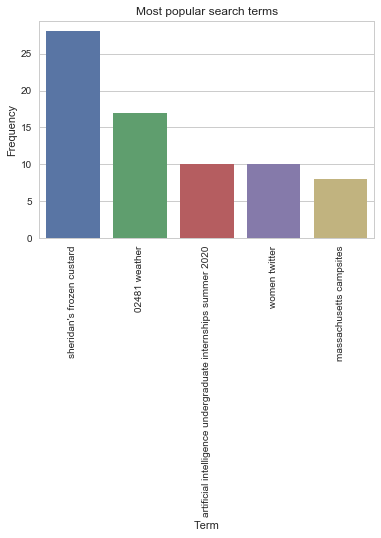

In [10]:
"""plot top five search terms"""
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=xvals[0:5], y=yvals[0:5])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Term')
plt.title('Most popular search terms')

**Figure 1: Most Popular Search Terms** This plot shows how often I searched for the top 5 most commonly searched terms in my browser history from Fall 2019. My search terms would suggest that I'm a young professional in computer science who lives in the 02481 zip code and in interested in the outdoors and frozen custard from the midwest! Pretty close, pretty cool.

## Part 2: Search Term Length
The distribution of the length size in words of your search phrases. (Create a boxplot for this)
<a id="sec2"></a>

In [12]:
"""store length of each search (by number of words)"""
lengths = []
for i in xvals:
    lengths.append(len(i.split()))

Text(0.5,1,'Length of search terms')

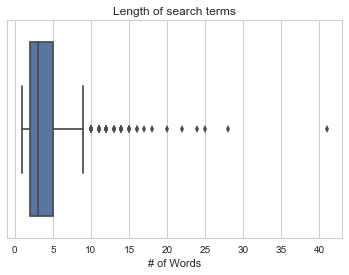

In [15]:
"""create boxplot based on search term length distribution"""
sns.set(style="whitegrid")
ax = sns.boxplot(x=lengths)
plt.xlabel('# of Words')
plt.title('Length of search terms')

**Figure 2: Length of search terms** This plot shows the distribution of the length of my search terms. There are quite a few outliers, as one day I searched for something over 40 words long, suggesting that I might have been trying to find a document based on a section from another source (I often do this with articles I'm interested in). However, most of my searches are around 3 words long which seems like a reasonable search.

## Part 3: Explore 'Visits'
Create a timeseries that eventually shows the number of web visits for every day in the history period.  Display it as a line plot.
<a id="sec3"></a>

In [16]:
cursor = conn.execute('SELECT * FROM visits')
cursor.description

(('id', None, None, None, None, None, None),
 ('url', None, None, None, None, None, None),
 ('visit_time', None, None, None, None, None, None),
 ('from_visit', None, None, None, None, None, None),
 ('transition', None, None, None, None, None, None),
 ('segment_id', None, None, None, None, None, None),
 ('visit_duration', None, None, None, None, None, None),
 ('incremented_omnibox_typed_score', None, None, None, None, None, None))

In [34]:
cursor = conn.execute('SELECT visit_time term FROM visits')
rows = cursor.fetchall()
times = []
for i in range(len(rows)):
    times.append(rows[i][0])

In [56]:
import datetime

def convertChromeTime(ms):
    """Convert the amount of microsends into a datetime object. 
    Google chrome doesn't use Unix epoch.
    """
    return datetime.datetime(1601, 1, 1) + datetime.timedelta(microseconds=ms)

In [57]:
"""convert datetime objects to only year, month, and day
to eliminate unnecessary time information"""
ct = []
for i in times:
    j = convertChromeTime(i)
    short = datetime.date(j.year, j.month, j.day)
    ct.append(short)

In [58]:
"""create counter dictionary to find number of searches per day"""
datefreq = c.Counter()
for word in ct:
    datefreq[word] += 1

Text(0.5,1,'Searches Over Time (8/31/19-11/29/19)')

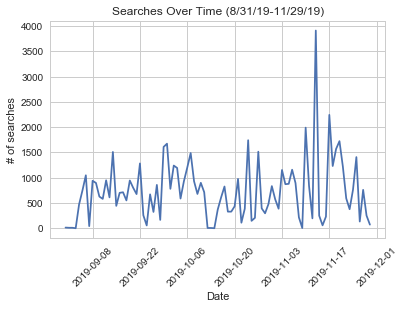

In [59]:
"""plot searches over time"""
plt.plot(datefreq.keys(),datefreq.values())
plt.xticks(rotation=45)
plt.ylabel('# of searches')
plt.xlabel('Date')
plt.title('Searches Over Time (8/31/19-11/29/19)')

**Figure 3: Searches over time** This plot shows how many searches I made daily over Fall 2019. The periods of few searches (like in early October) line up with breaks like fall break of this year. I'm curious about what I was searching for in November where I have a lot of queries. Perhaps I was working on a CS project and looking up a lot of ways to debug something?

## Part 4: Searches Heatmap
Use seaborn or plotly to create a heatmap that has a x values the days for the week (Monday, etc.), as y values the weeks of my dataset (Aug 3 - Aug 10, etc.), and the value of each cell is the count of visits that day.
<a id="sec4"></a>

In [146]:
"""create a new list of the day for each datetime object"""
d = []
for key in datefreq.keys():
    d.append(key.weekday())
wds = [None]*len(d)
for i in range(len(d)):
    if d[i] == 0: wds[i]='Monday'
    if d[i] == 1: wds[i]='Tuesday'
    if d[i] == 2: wds[i]='Wednesday'
    if d[i] == 3: wds[i]='Thursday'
    if d[i] == 4: wds[i]='Friday'
    if d[i] == 5: wds[i]='Saturday'
    if d[i] == 6: wds[i]='Sunday'

In [123]:
"""create a new list of the week for each datetime object"""
dates = list(datefreq.keys())
n_searches = list(datefreq.values())
days = wds
wk = []
for i in range(len(d)):
    wk.append(dates[i].isocalendar()[1])

In [125]:
"""compile all lists into a single dataframe"""
lst = []
for i in range(len(dates)):
    lst.append([dates[i],days[i],d[i],wk[i],n_searches[i]])
df = pd.DataFrame(lst,columns = ['date','day','day_number','week','searches'])

In [126]:
df.head()

,date,day,day_number,week,searches
0,2019-08-31,Saturday,5,35,14
1,2019-09-01,Sunday,6,35,10
2,2019-09-02,Monday,0,36,10
3,2019-09-03,Tuesday,1,36,1
4,2019-09-04,Wednesday,2,36,471


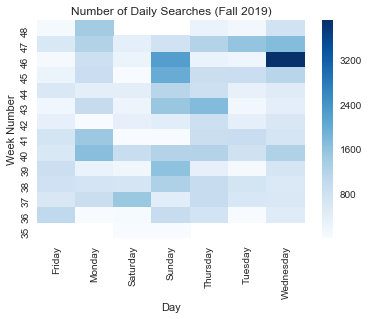

In [145]:
"""create a heatmap of searches over fall 2019"""
result = df.pivot(index='week', columns='day', values='searches')
sns.heatmap(result, fmt="g", cmap='Blues').invert_yaxis()
plt.title("Number of Daily Searches (Fall 2019)")
plt.ylabel('Week Number')
plt.xlabel('Day')
plt.show()

**Figure 4: Number of daily searches (Fall 2019)*** This plot shows how many searches I made both weekly and on each day over Fall 2019. I expected there to be a clearer boundary between, say, the number of searches I make during weekdays vs. weekends over the course of a week. However, except for that day in November where I made almost 4000 searches, my searches over the semester seem relatively uncorrelated with time.